In [5]:
# Python program for implementation
# of Ford Fulkerson algorithm
from collections import defaultdict
 
# This class represents a directed graph
# using adjacency matrix representation
class Graph:
 
    def __init__(self, graph):
        self.graph = graph  # residual graph
        self. ROW = len(graph)
        # self.COL = len(gr[0])
 
    '''Returns true if there is a path from source 's' to sink 't' in
    residual graph. Also fills parent[] to store the path '''
 
    def BFS(self, s, t, parent):
 
        # Mark all the vertices as not visited
        visited = [False]*(self.ROW)
 
        # Create a queue for BFS
        queue = []
 
        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True
 
         # Standard BFS Loop
        while queue:
 
            # Dequeue a vertex from queue and print it
            u = queue.pop(0)
 
            # Get all adjacent vertices of the dequeued vertex u
            # If a adjacent has not been visited, then mark it
            # visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                      # If we find a connection to the sink node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True
 
        # We didn't reach sink in BFS starting
        # from source, so return false
        return False
             
     
    # Returns tne maximum flow from s to t in the given graph
    def FordFulkerson(self, source, sink):
 
        # This array is filled by BFS and to store path
        parent = [-1]*(self.ROW)
 
        max_flow = 0 # There is no flow initially
 
        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :
 
            # Find minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while(s !=  source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]
 
            # Add path flow to overall flow
            max_flow +=  path_flow
 
            # update residual capacities of the edges and reverse edges
            # along the path
            v = sink
            while(v !=  source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
 
        return max_flow

#This code is contributed by Neelam Yadav 

In [177]:
import numpy as np
import time
import matplotlib.pyplot as plt

time_values = []
data_values = []

ITER = 100
VERTICES = 50
MAX_CAPACITY = 10

In [178]:
n_delta = VERTICES/ITER
n = 0

for i in range (ITER):
    n = (int) (n + n_delta + 0.5)
 
    graph = np.random.randint(MAX_CAPACITY, size=(n, n))

    graph = np.pad(graph, [(0, 1), (1, 0)], mode='constant')

    np.fill_diagonal(graph, 0)

    e = np.count_nonzero(graph)

    g = Graph(graph)
 
    source = 0; sink = n

    start = time.time()
    f = g.FordFulkerson(source, sink)
    end = time.time()

    t = end - start

    time_values.append(t)
    data_values.append(e*f)

0.031030654907226562


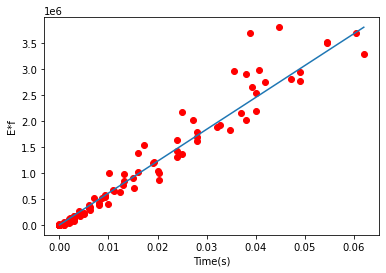

In [179]:
x = [0, np.amax(time_values)]
y = [0, np.amax(data_values)]

time_avg = np.amax(time_values)/2

print(time_avg)

plt.plot(time_values, data_values, 'ro')
plt.plot(x, y)

plt.xlabel("Time(s)")
plt.ylabel("E*f")

plt.show()